In [48]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm  


In [49]:
# Importing day.csv
bike_sharing = pd.read_csv('day.csv')
# Looking at the first five rows
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [50]:
# Dataframe shape
bike_sharing.shape

(730, 16)

In [51]:
# Dataframe entries, type
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Basis the above, the dataset doesn't have null or missing entries. Because the parameters such as season, month, week day are encoded already, we do not change them.
#### We will look at dropping the columns during model building

## Data visualization

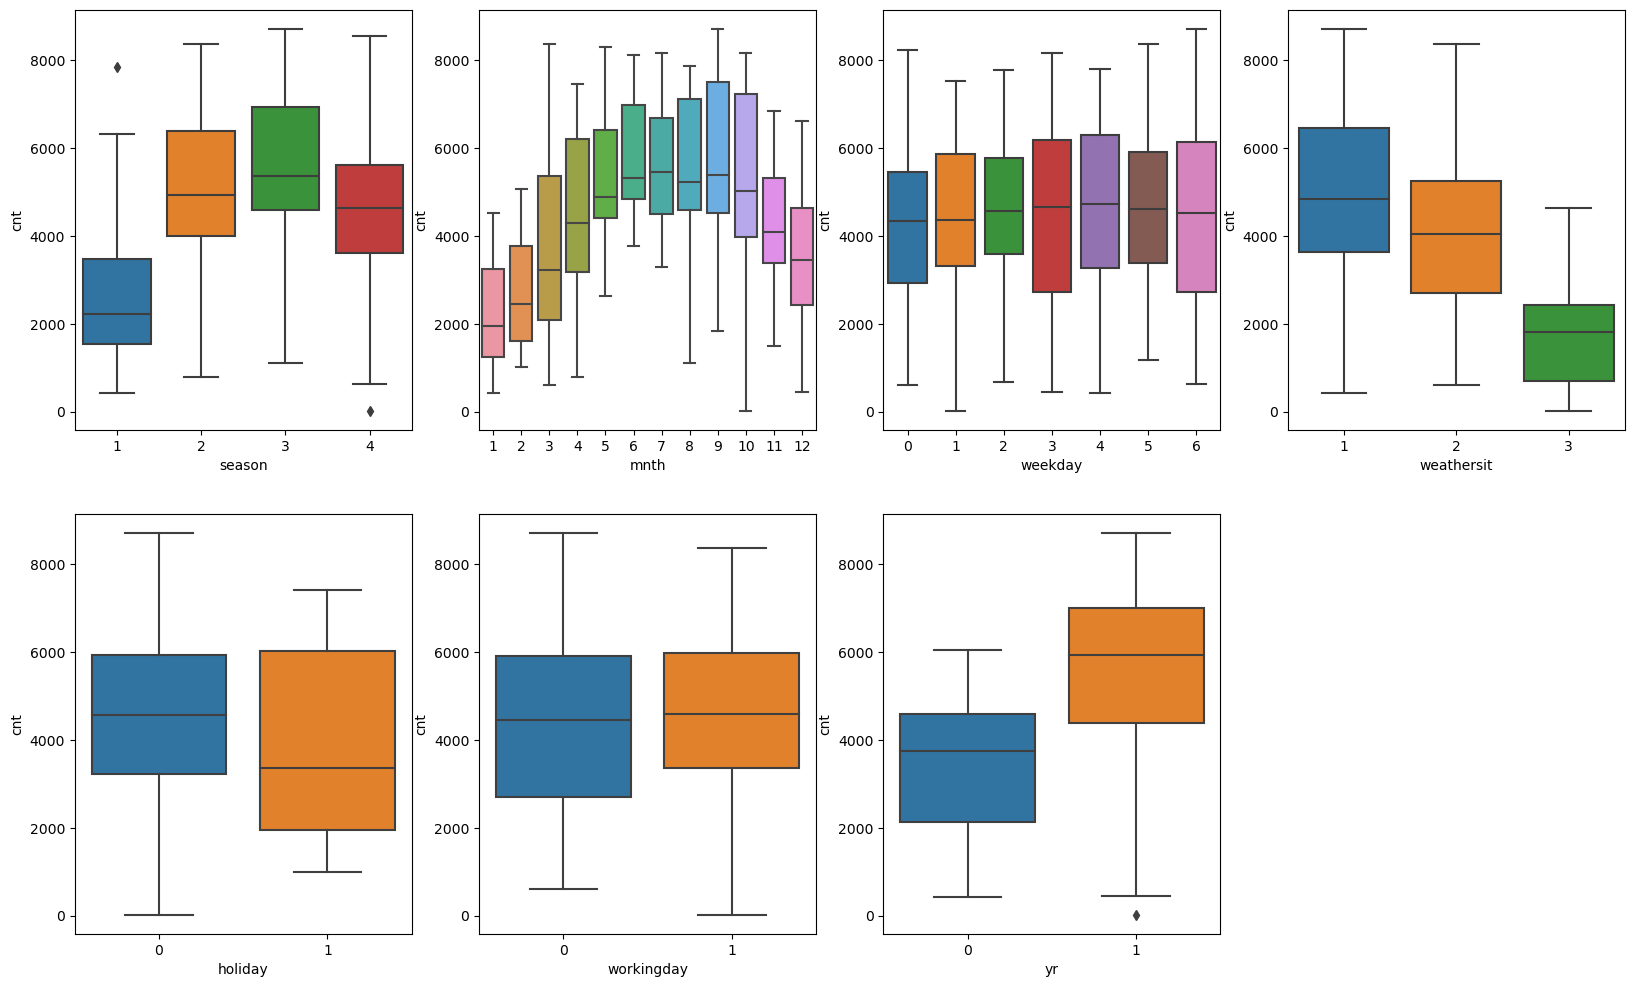

In [52]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.show()

#### Basis the above, season 3 has higher median, and overall, a higher count.

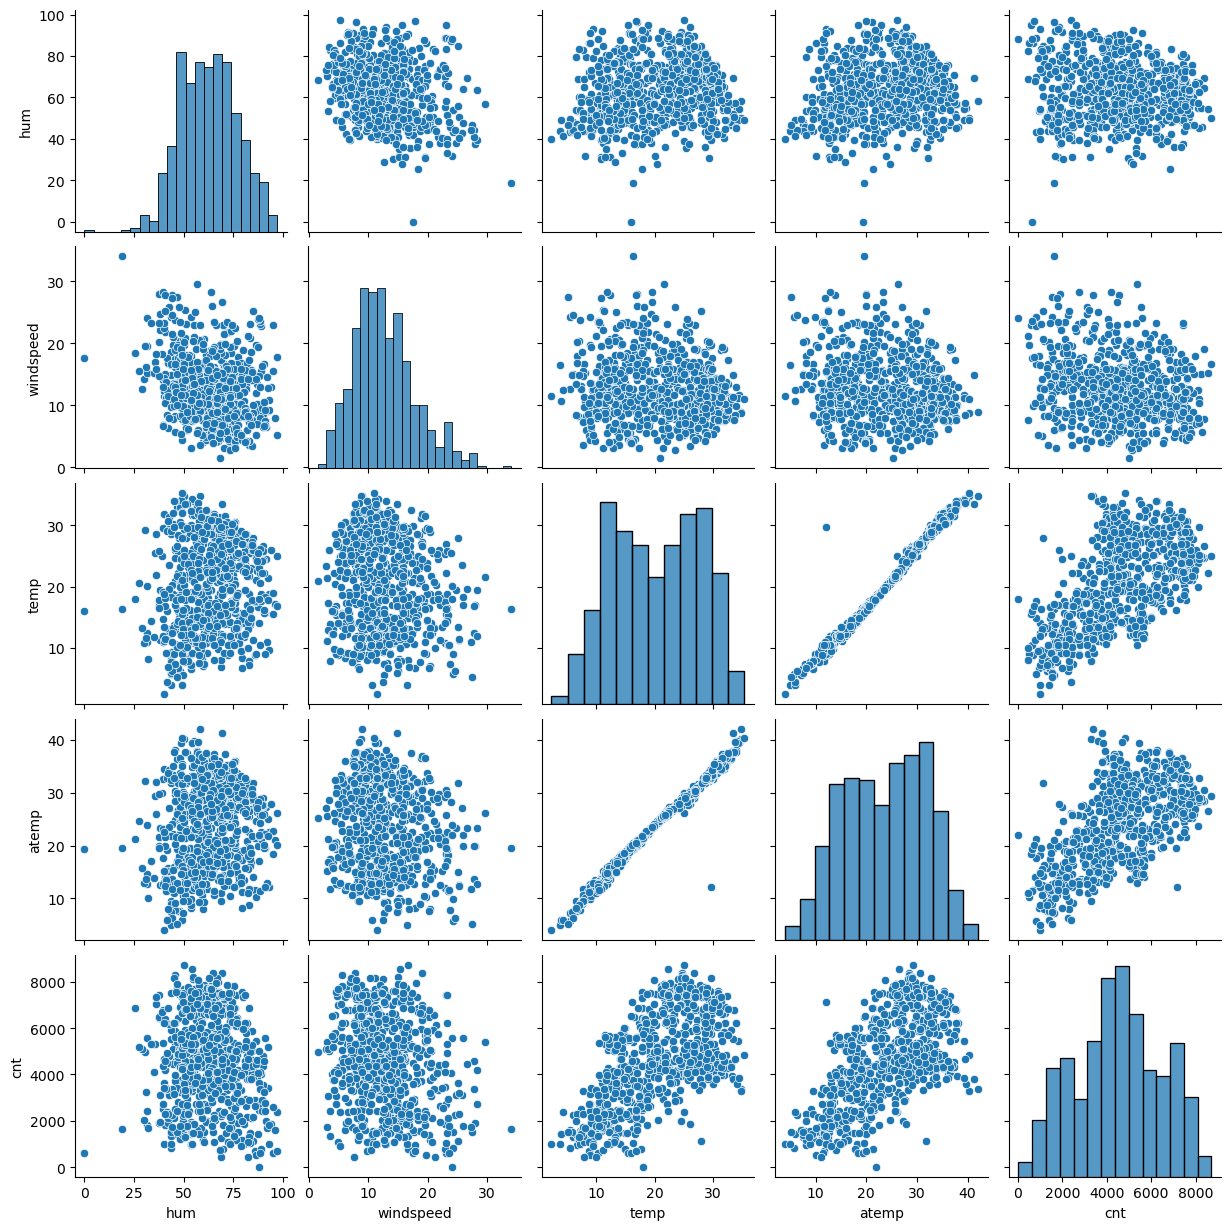

In [53]:
# Quantitative data visualization

sns.pairplot(data=bike_sharing,vars=['hum','windspeed','temp','atemp','cnt'])
plt.show()

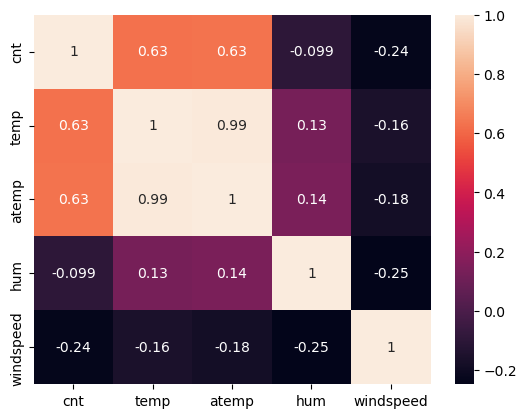

In [54]:
# Correlation 
sns.heatmap(bike_sharing[['cnt','temp','atemp','hum','windspeed']].corr(), annot = True)
plt.show()

#### Basis above, the target variable cnt, seems to have linear relation with temp and atemp. As expected, actual temperature and the temperature that is felt are correlated.

In [55]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [56]:
bi_sh = bike_sharing
bi_sh.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [57]:
bi_sh.shape

(730, 16)

In [58]:
bike_sharing.season

0      1
1      1
2      1
3      1
4      1
      ..
725    1
726    1
727    1
728    1
729    1
Name: season, Length: 730, dtype: int64

In [59]:
# Decoding the categorical variables

bi_sh.season = bi_sh.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bi_sh.mnth = bi_sh.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bi_sh.weekday = bi_sh.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bi_sh.weathersit = bi_sh.weathersit.map({1:'Clear',2:'Misty',3:'Light_rain_snow',4:'Heavy_rain_snow'})

In [60]:
bi_sh.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [61]:
# Create dummy variables 

month_bi_sh=pd.get_dummies(bi_sh.mnth,drop_first=True)
weekday_bi_sh=pd.get_dummies(bi_sh.weekday,drop_first=True)
weathersit_bi_sh=pd.get_dummies(bi_sh.weathersit,drop_first=True)
season_bi_sh=pd.get_dummies(bi_sh.season,drop_first=True)

In [62]:
bi_sh.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [63]:
bi_sh.shape

(730, 16)

In [64]:
# Merging dummy variable with the data frame
new_dataframe = pd.concat([bi_sh,month_bi_sh,weekday_bi_sh,weathersit_bi_sh,season_bi_sh],axis=1)
new_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Sat,Sun,Thu,Tue,Wed,Light_rain_snow,Misty,Spring,Summer,Winter
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Misty,14.110847,...,1,0,0,0,0,0,1,1,0,0
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Misty,14.902598,...,0,1,0,0,0,0,1,1,0,0
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,...,0,0,0,1,0,0,0,1,0,0
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,...,0,0,0,0,1,0,0,1,0,0


In [65]:
new_dataframe.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'Light_rain_snow', 'Misty', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [66]:
# Dropping the columns with no impact on modeling
new_dataframe.drop(['instant','dteday','season','mnth','weekday','weathersit'],axis=1,inplace=True)
new_dataframe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Sat,Sun,Thu,Tue,Wed,Light_rain_snow,Misty,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,1,0,0,1,0,0


In [67]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   casual           730 non-null    int64  
 8   registered       730 non-null    int64  
 9   cnt              730 non-null    int64  
 10  Aug              730 non-null    uint8  
 11  Dec              730 non-null    uint8  
 12  Feb              730 non-null    uint8  
 13  Jan              730 non-null    uint8  
 14  Jul              730 non-null    uint8  
 15  Jun              730 non-null    uint8  
 16  Mar              730 non-null    uint8  
 17  May             

## Splitting the Data into Training and Testing Sets

In [68]:
df_train, df_test = train_test_split(new_dataframe, train_size = 0.7, test_size = 0.3, random_state = 100)

In [69]:
df_test.shape

(219, 32)

In [70]:
df_train.shape

(510, 32)

### Scaling

In [71]:
scaler = MinMaxScaler()
num_vars = ['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   atemp            510 non-null    float64
 5   hum              510 non-null    float64
 6   windspeed        510 non-null    float64
 7   casual           510 non-null    int64  
 8   registered       510 non-null    int64  
 9   cnt              510 non-null    float64
 10  Aug              510 non-null    uint8  
 11  Dec              510 non-null    uint8  
 12  Feb              510 non-null    uint8  
 13  Jan              510 non-null    uint8  
 14  Jul              510 non-null    uint8  
 15  Jun              510 non-null    uint8  
 16  Mar              510 non-null    uint8  
 17  May            

In [72]:
y_train = df_train.pop('cnt')
X_train = df_train

In [73]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,Aug,...,Sat,Sun,Thu,Tue,Wed,Light_rain_snow,Misty,Spring,Summer,Winter
653,1,0,1,19.201653,0.501133,0.575354,0.300794,922,6612,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,29.246653,0.766351,0.725633,0.264686,968,6248,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,956,3110,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,0.200348,0.498067,0.663106,364,1432,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,1120,3100,0,...,1,0,0,0,0,0,1,0,1,0


In [74]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [75]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = LinearRegression(), n_features_to_select = 15)            
rfe = rfe.fit(X_train, y_train)

In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 17),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 14),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 15),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 13),
 ('Jun', False, 7),
 ('Mar', False, 10),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', False, 2),
 ('Mon', True, 1),
 ('Sat', False, 3),
 ('Sun', True, 1),
 ('Thu', False, 6),
 ('Tue', True, 1),
 ('Wed', False, 4),
 ('Light_rain_snow', False, 11),
 ('Misty', False, 16),
 ('Spring', False, 5),
 ('Summer', False, 8),
 ('Winter', False, 12)]

In [77]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe_with_cons1 = sm.add_constant(X_train_rfe)

In [78]:
lm_1 = sm.OLS(y_train,X_train_rfe_with_cons1).fit()

In [79]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.639e+30
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:59:39   Log-Likelihood:                 17092.
No. Observations:                 510   AIC:                        -3.415e+04
Df Residuals:                     494   BIC:                        -3.408e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025   2.44e-16  -1.04e+13      0.0

In [80]:
# VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,18.96
6,registered,14.92
3,hum,12.73
1,workingday,10.67
5,casual,8.66
4,windspeed,3.70
13,Sun,1.85
12,Mon,1.45
9,Jan,1.43
0,holiday,1.34


In [81]:
# Working day has high VIF, so dropping
X_train_rfe = X_train_rfe.drop(['atemp'],axis=1)

In [82]:
X_train_rfe_cons2 = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train,X_train_rfe_cons2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.714e+30
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:01:14   Log-Likelihood:                 17296.
No. Observations:                 510   AIC:                        -3.456e+04
Df Residuals:                     495   BIC:                        -3.450e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025   1.62e-16  -1.56e+13      0.0

In [83]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,registered,14.32
2,hum,10.07
1,workingday,9.94
4,casual,6.95
3,windspeed,3.68
12,Sun,1.83
11,Mon,1.45
0,holiday,1.32
13,Tue,1.32
8,Jan,1.26


In [84]:
# Temperature has high VIF, so dropping
X_train_rfe = X_train_rfe.drop(['registered'],axis=1)
X_train_rfe_cons3 = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_rfe_cons3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     100.2
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.68e-129
Time:                        19:01:30   Log-Likelihood:                 367.01
No. Observations:                 510   AIC:                            -706.0
Df Residuals:                     496   BIC:                            -646.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2068      0.041      5.030      0.0

In [85]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.05
1,workingday,5.63
3,windspeed,3.68
4,casual,3.33
11,Sun,1.83
10,Mon,1.45
12,Tue,1.32
0,holiday,1.31
7,Jan,1.25
5,Aug,1.21


In [86]:
# Registered has high VIF, so dropping
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)
X_train_rfe_cons4 = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train,X_train_rfe_cons4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.95e-128
Time:                        19:01:47   Log-Likelihood:                 362.02
No. Observations:                 510   AIC:                            -698.0
Df Residuals:                     497   BIC:                            -643.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1081      0.027      4.062      0.0

In [87]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.40
1,workingday,3.33
3,casual,2.35
10,Sun,1.65
9,Mon,1.45
11,Tue,1.32
0,holiday,1.27
4,Aug,1.20
5,Feb,1.19
6,Jan,1.18


In [88]:
# Casual has high VIF, so dropping
X_train_rfe = X_train_rfe.drop(['windspeed'],axis=1)
X_train_rfe_cons5 = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train,X_train_rfe_cons5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     114.2
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.97e-128
Time:                        19:02:06   Log-Likelihood:                 359.54
No. Observations:                 510   AIC:                            -695.1
Df Residuals:                     498   BIC:                            -644.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0752      0.022      3.399      0.0

In [89]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,2.43
2,casual,2.06
9,Sun,1.56
8,Mon,1.45
10,Tue,1.32
0,holiday,1.25
3,Aug,1.20
5,Jan,1.14
6,Nov,1.14
7,Oct,1.14


In [90]:
# Humidity has high VIF, so dropping
X_train_rfe = X_train_rfe.drop(['workingday'],axis=1)
X_train_rfe_cons6 = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train,X_train_rfe_cons6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     73.60
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.37e-91
Time:                        19:02:51   Log-Likelihood:                 269.59
No. Observations:                 510   AIC:                            -517.2
Df Residuals:                     499   BIC:                            -470.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3416      0.015     23.242      0.0

In [91]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,casual,1.72
8,Sun,1.40
7,Mon,1.23
2,Aug,1.17
0,holiday,1.15
6,Oct,1.12
9,Tue,1.11
5,Nov,1.08
3,Feb,1.06
4,Jan,1.05


In [92]:
# Humidity has high VIF, so dropping
X_train_rfe = X_train_rfe.drop(['casual'],axis=1)
X_train_rfe_cons7 = sm.add_constant(X_train_rfe)
lm_7 = sm.OLS(y_train,X_train_rfe_cons7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     21.08
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.92e-30
Time:                        19:03:12   Log-Likelihood:                 120.55
No. Observations:                 510   AIC:                            -221.1
Df Residuals:                     500   BIC:                            -178.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5568      0.013     41.787      0.0

In [93]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Mon,1.18
0,holiday,1.14
7,Sun,1.09
8,Tue,1.08
4,Nov,1.07
5,Oct,1.07
2,Feb,1.06
3,Jan,1.05
1,Aug,1.04


In [94]:
lm_7.params

const      0.556810
holiday   -0.072964
Aug        0.114263
Feb       -0.262775
Jan       -0.310396
Nov       -0.068904
Oct        0.010597
Mon        0.006775
Sun       -0.033402
Tue        0.010551
dtype: float64

### All above have VIF < 1.5. So, the model may be acceptable.

In [95]:
#Prediction
y_train_pred = lm_7.predict(X_train_rfe_cons7)

In [96]:
#Residue
resid =y_train - y_train_pred

Text(0.5, 0, 'Error')

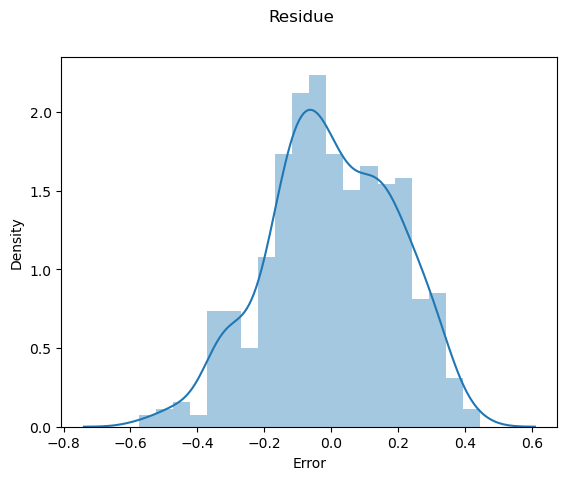

In [97]:
fig = plt.figure()
sns.distplot((resid), bins = 20)
fig.suptitle('Residue', fontsize = 12)                  
plt.xlabel('Error', fontsize = 10)     

In [98]:
# Processing test data
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('cnt')
X_test = df_test

In [99]:
y_test.shape

(219,)

In [102]:
y_train_pred.shape

(510,)

In [105]:
colu1 = X_train_rfe.columns
X_test = X_test[colu1]
X_test_lm_7 = sm.add_constant(X_test)

In [106]:
y_pred = lm_7.predict(X_test_lm_7)

In [110]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(round(r2,3))

0.202
